![image.png](attachment:image.png)

![image.png](attachment:image.png)

In [ ]:
!pip install seaborn
import seaborn as sb

In [ ]:
!pip install statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
# Importar as bibliotecas

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

# Esse comando serve para plotar os gráficos estáticos logo abaixo da célula,
# existem outras configurações do %matplolib que podem mostrar os gráficos em outras abas ou gráficos dinâmicos.
# Por padrão, desde a versão 3.7 do python anaconda, a configuração padrão do %matplotlib já é o inline.
# https://ipython.readthedocs.io/en/stable/interactive/plotting.html

import statsmodels.api as sm
import statsmodels.formula.api as smf



#ocultando avisos
#import warnings
#warnings.filterwarnings('ignore')


In [ ]:
!pip install scikit-learn


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.tree import plot_tree


from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, accuracy_score, auc
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


#### Abaixo estão as descrições das colunas do  Dataset Titanic:
    . passengerid = ID do passageiro do navio (código primário).
    . survived = Se sobreviveu ao naufrágio estará como 1 e caso esteja com 0 (zero) não sobreviveu.
    . pclass = Tipo de classe de passagem (Do 1 ao 3), (1 = 1st, 2 = 2nd, 3 = 3rd).
    . name = Nome do passageiro
    . sex = Gênero do passageiro, sendo masculino e feminino.
    . age = Idade do passageiro na data da ocorrência do naufrágio.
    . sibsp = Número de irmãos / cônjuges a bordo.
    . parch = Número de pais / filhos a bordo.
    . ticket = Código do ticket.
    . fare = Valor da passagem.
    . cabin = Código de identificação da Cabine.
    . embarked = Local ondem o passageiro embarcou no navio: C = Cherbourg, Q = Queenstown, S = Southampton)

In [ ]:
# Importando os dados e as verificando as primeiras observações
titanic = pd.read_csv('titanic_train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Conteúdo da base
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Avaliando a quantidade de NA´s (missing)
pd.DataFrame(zip(titanic.isnull().sum(), titanic.isnull().sum()/len(titanic)), columns=['Count', 'Proportion'], index=titanic.columns)


,Count,Proportion
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,177,0.198653
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000


In [ ]:
# Descritivo: variáveis quantitativas
titanic.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [ ]:
# Uma variável é a variável target: "Suvived" : Quantos sobreviveram e não sobreviveram

# Como estamos trabalhando com uma amostra ==> Avaliar em percentual


(titanic.Survived.value_counts() / titanic.shape[0]) * 100

0    61.616162
1    38.383838
Name: Survived, dtype: float64

In [ ]:

# Importando de um repositório no github e as primeiras observações da base test

titanic_test = pd.read_csv('titanic_test.csv')
titanic_test.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
# Verificando as colunas do dataset de teste
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
# Verificando a quantidade de elementos nulos no treino

print(titanic_test.isnull().sum().sort_values(ascending = False))

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64


# Iniciando o pré processamento

### A Análise Exploratória deve seguir a metodologia sempre focada no objetivo do estudo

### PROCESSO KDD -  KNOWLEDGE DISCOVERY IN DATABASES
Fonte: Processo de KDD. Adaptado de Fayyad et al. (1996a).
 ![image-3.png](attachment:image-3.png)

### As análises a seguir sempre usaremos a variável target"Survived"
#### Variáveis preditoras quantitativas e Variáveis categóricas

<Axes: xlabel='Fare', ylabel='Count'>

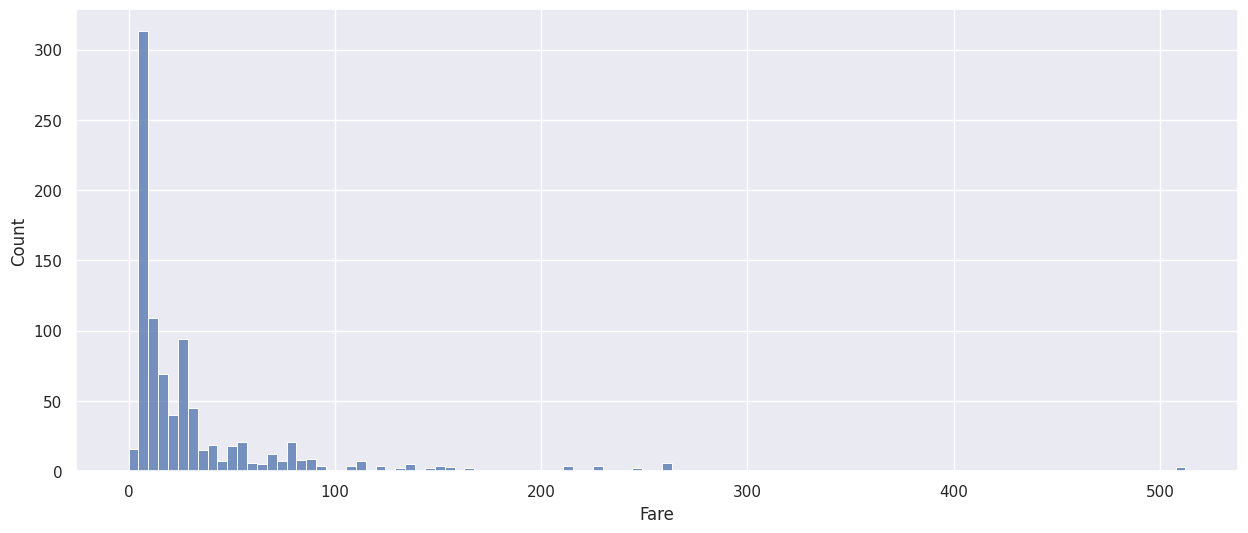

In [ ]:
# Verificando a variável fare

sb.histplot(data=titanic, x="Fare")

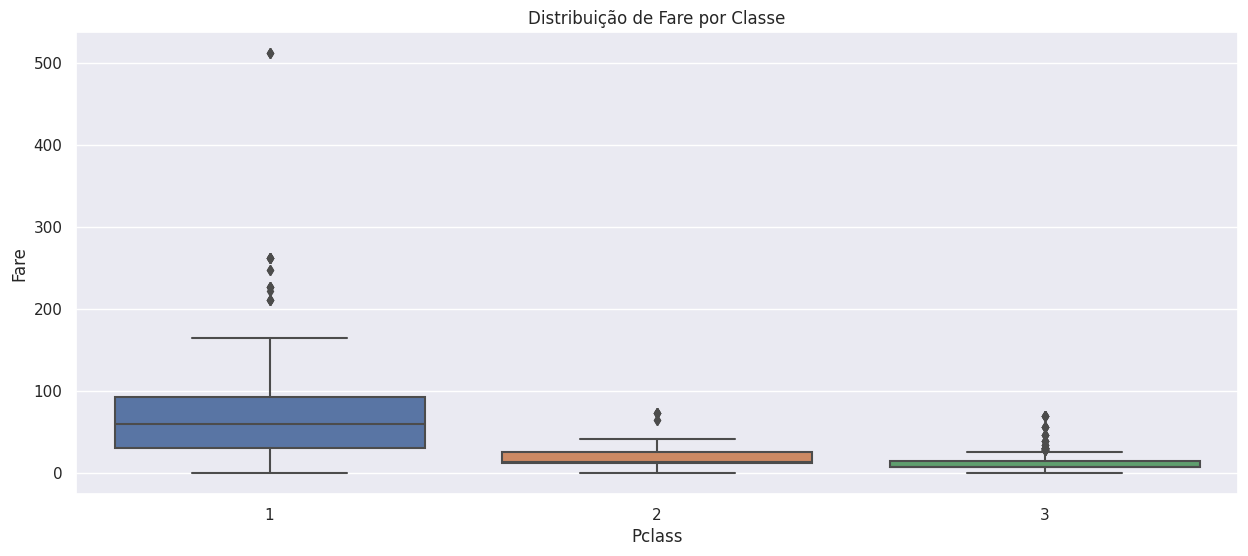

In [ ]:
# Variável Fare
sb.boxplot(x='Pclass', y='Fare', data=titanic)
plt.title('Distribuição de Fare por Classe')
plt.show()

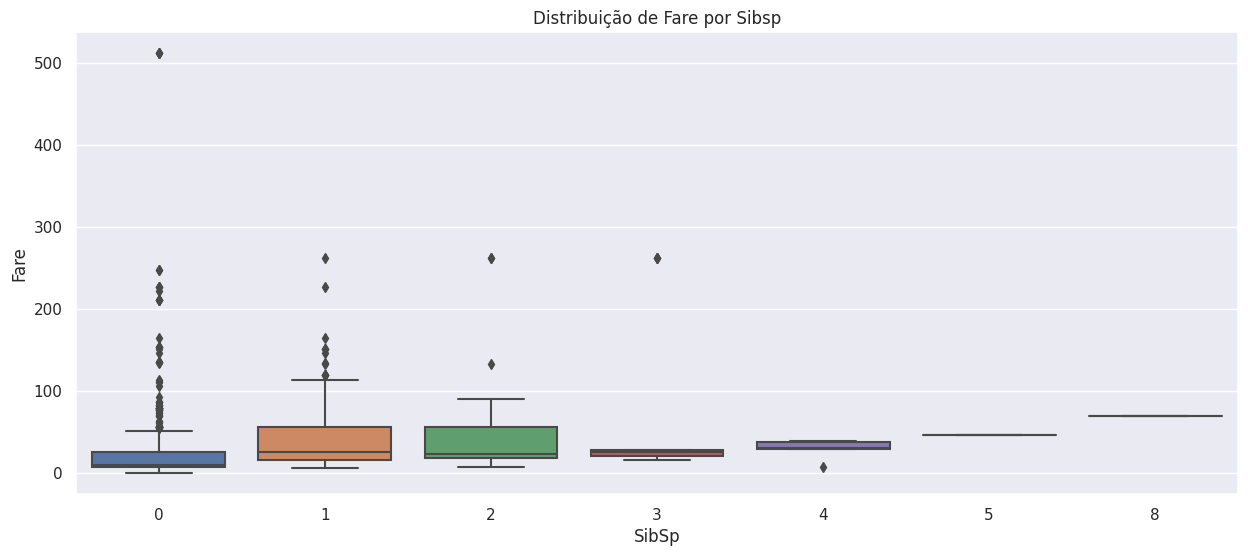

In [ ]:
# Variável Fare
sb.boxplot(x='SibSp', y='Fare', data=titanic)
plt.title('Distribuição de Fare por Sibsp')
plt.show()

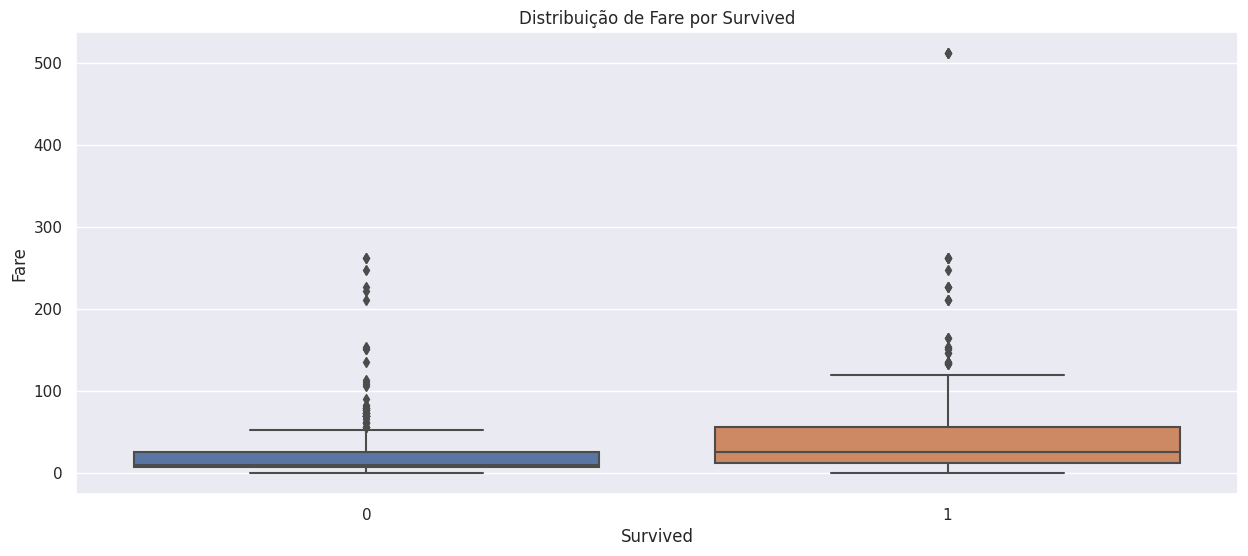

In [ ]:
# Variável Fare  com a variável target  (Objetivo)
sb.boxplot(x='Survived', y='Fare', data=titanic)
plt.title('Distribuição de Fare por Survived')
plt.show()

In [ ]:
# Uma opção sobre como eliminar outliers é achatamento de algum valor descrepante

titanic.loc[titanic['Fare']>=300, 'Fare'] = 300


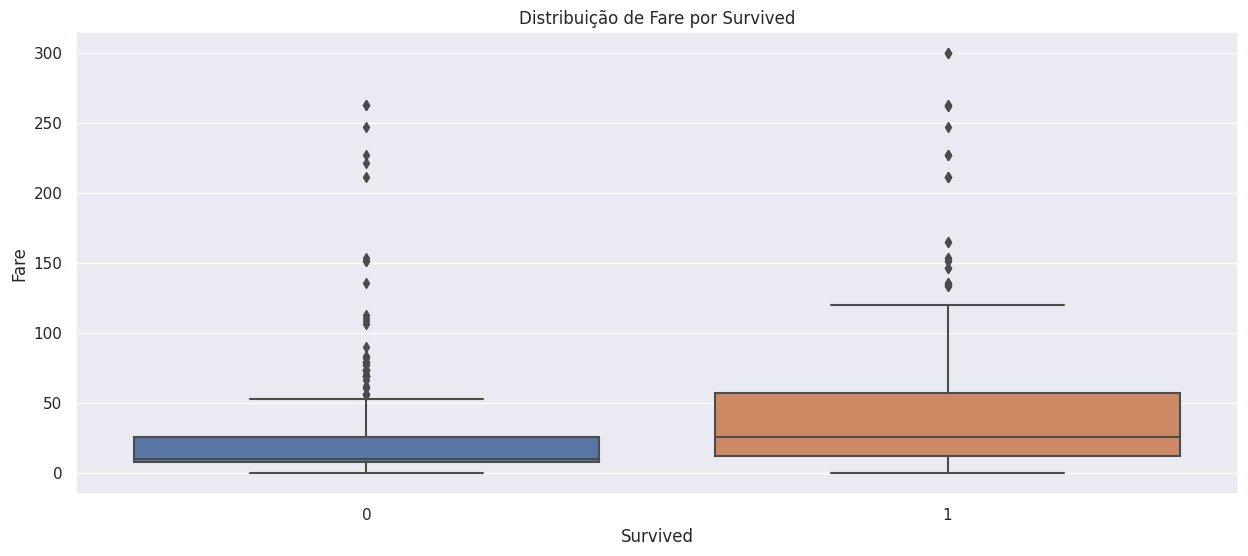

In [ ]:
# Variável Fare  com a variável target  (Objetivo)
sb.boxplot(x='Survived', y='Fare', data=titanic)
plt.title('Distribuição de Fare por Survived')
plt.show()

<Axes: xlabel='Age', ylabel='Count'>

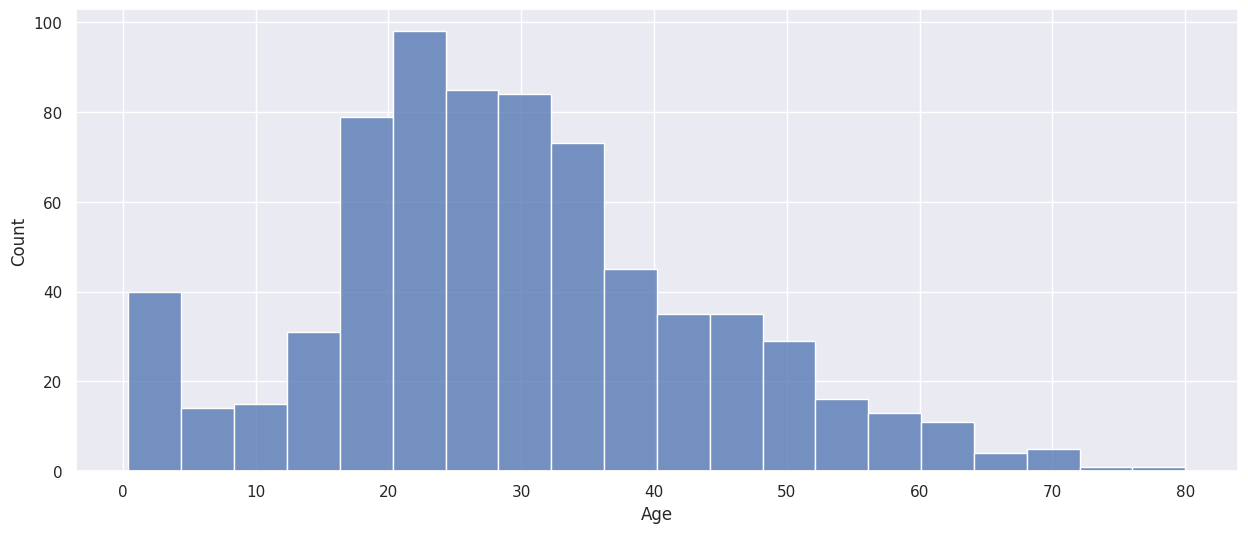

In [ ]:
# Verificando a faixa de idade das pessoas

sb.histplot(data=titanic, x="Age")

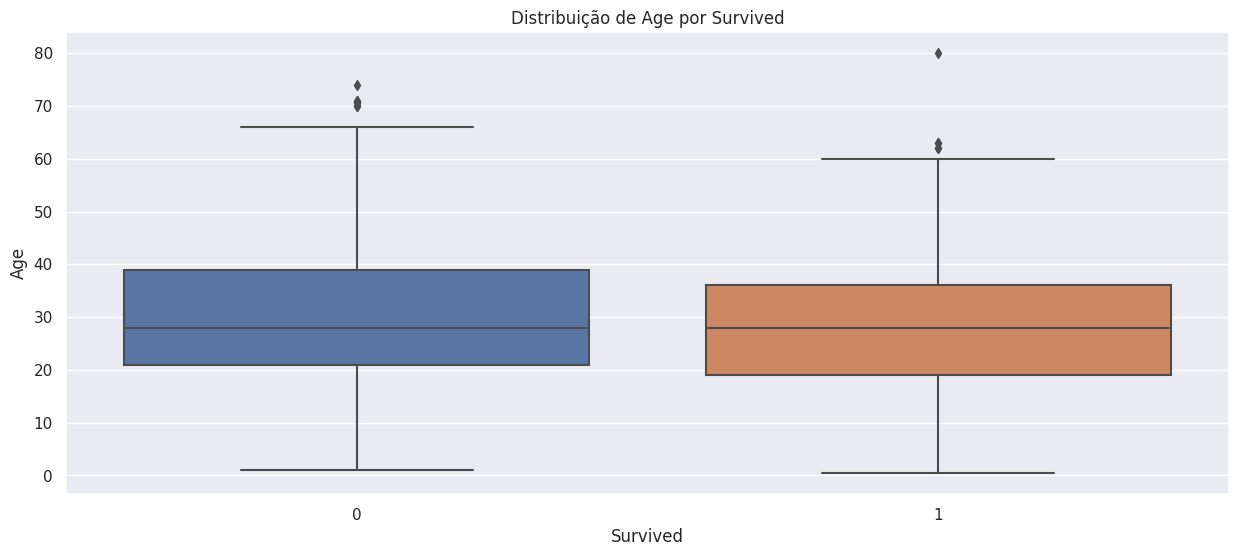

In [ ]:
# Variável Idade
sb.boxplot(x='Survived', y='Age', data=titanic)
plt.title('Distribuição de Age por Survived')
plt.show()

Curiosidade!!!!

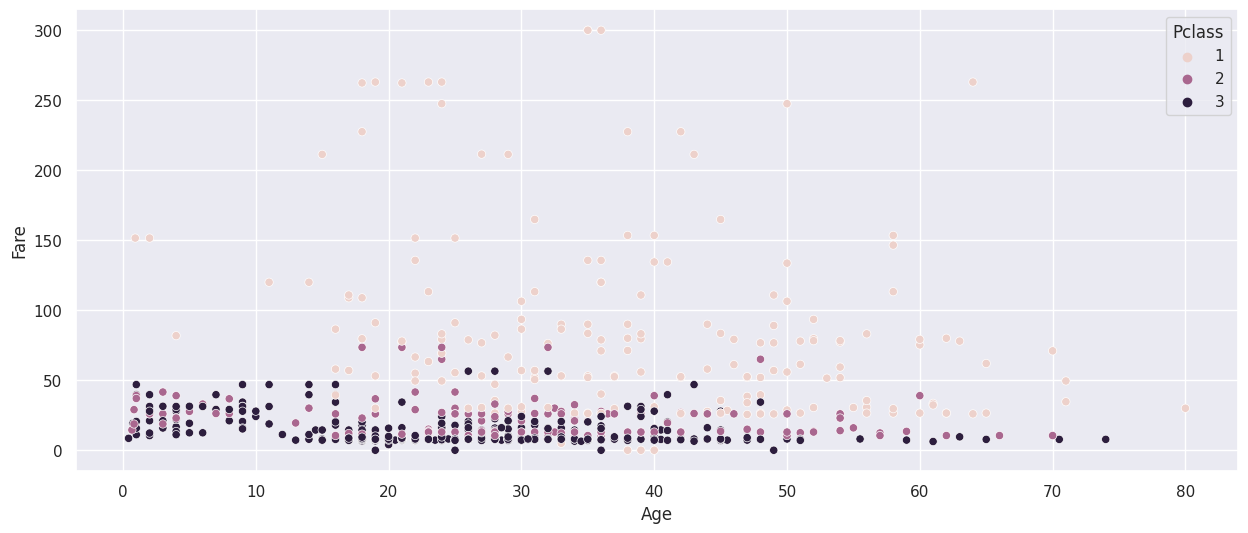

In [ ]:
# Gráfico de dispersão com Seaborn
sb.set(rc = {'figure.figsize':(15, 6)})
sb.scatterplot(data=titanic, x='Age', y='Fare', hue='Pclass');

Plotly-Express
Biblioteca para criação de gráficos interativos (https://plotly.com/python/plotly-express).

In [ ]:
!pip install plotly
import plotly.express as px

In [ ]:
px.scatter(data_frame=titanic, x='Age', y='Fare', color="Pclass")

###    " Age " é uma variável que tem um percentual grande de missing´s - O que fazer?

In [ ]:

Age_mean = titanic['Age'].mean()


Age_mean

29.69911764705882

In [ ]:
Age_median = titanic['Age'].median()
Age_median

# Possibilidade 1: Se ok! é só trocar missing pela mediana titanic['Age'].fillna(Age_median,inplace=True)

28.0

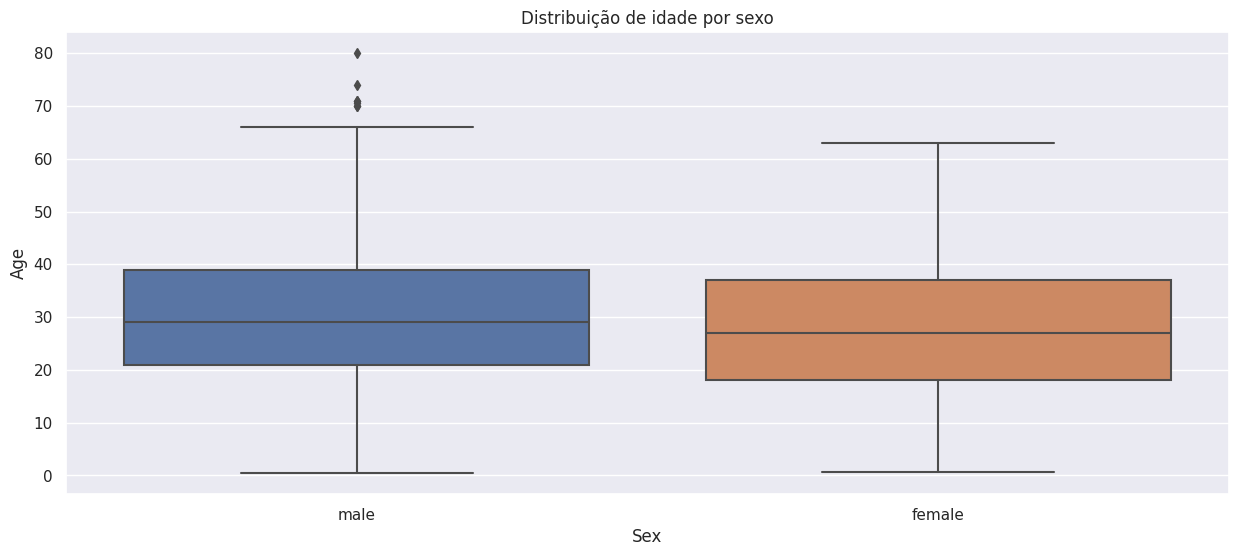

In [ ]:
# Possibilidade 2: Avaliar Idade por sexo - Graficamente
sb.boxplot(x='Sex', y='Age', data=titanic)
plt.title('Distribuição de idade por sexo')
plt.show()

In [ ]:
# Calculando idade mediana por sexo
C_median= titanic['Age'].groupby(by=titanic.Sex).median()

# exibindo
C_median

Sex
female    27.0
male      29.0
Name: Age, dtype: float64

In [ ]:
# Calculando idade mediana por sexo
C_median= titanic['Age'].groupby(by=titanic.Pclass).median()

# exibindo
C_median

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [ ]:
# Possibilidade 3: Estimando a idade média por várias outras variáveis

trainMeans = titanic.groupby(['Pclass', 'Sex'])['Age'].mean()

trainMeans


Pclass  Sex   
1       female    34.611765
        male      41.281386
2       female    28.722973
        male      30.740707
3       female    21.750000
        male      26.507589
Name: Age, dtype: float64

In [ ]:
# aplicando as médias
def f(x):
    if not np.isnan(x["Age"]):  # not NaN
        return x["Age"]
    return trainMeans[x["Pclass"], x["Sex"]]

titanic['Age'] = titanic.apply(f, axis=1)



In [ ]:
# Como ficaram as estatísticas básicas

titanic.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.000000,668.5,891.0
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.000000,1.0,1.0
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.000000,3.0,3.0
Age,891.0,29.318643,13.281103,0.42,21.7500,26.507589,36.0,80.0
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.000000,1.0,8.0
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.000000,0.0,6.0
Fare,891.0,31.489295,43.973014,0.00,7.9104,14.454200,31.0,300.0


<Axes: xlabel='Sex'>

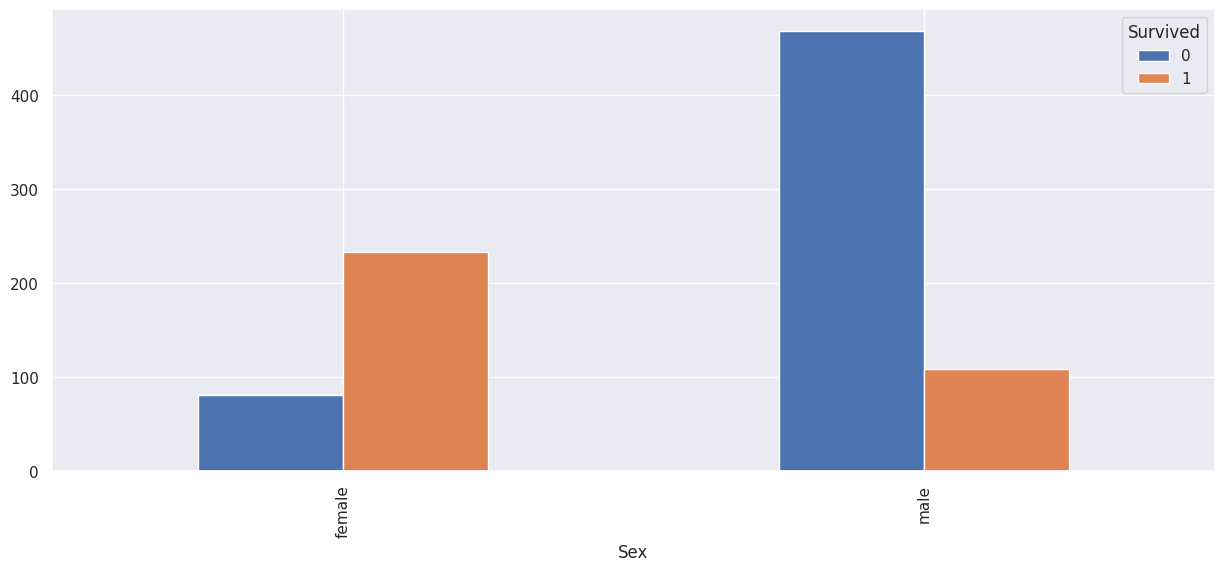

In [ ]:
# Variáveis Preditoras Qualitativas
# Sexo
titanic.groupby('Survived')['Sex'].value_counts().unstack(0).plot.bar()

<Axes: xlabel='Embarked'>

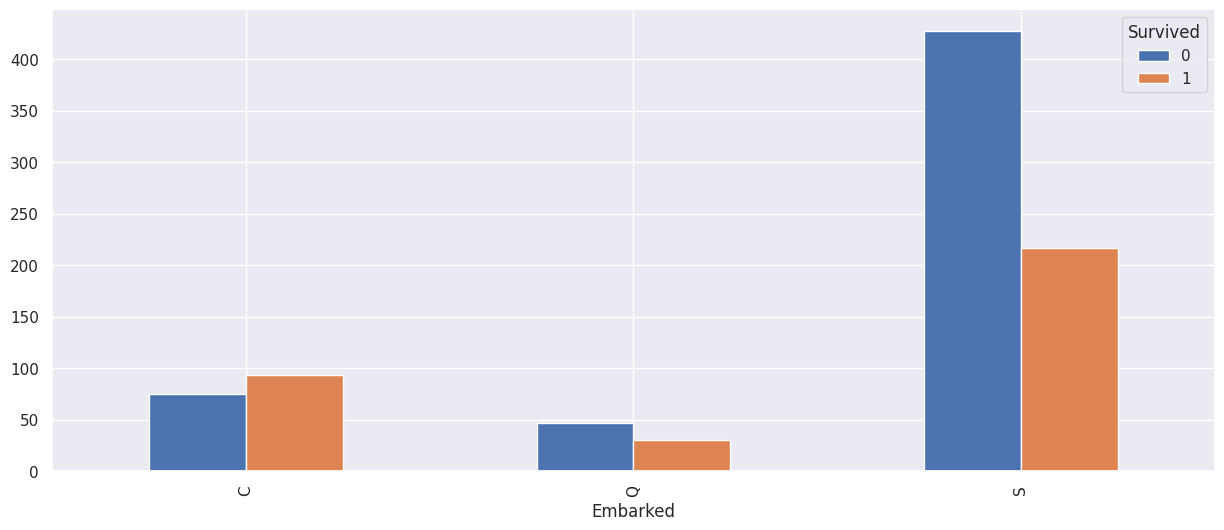

In [ ]:
# Variável Porto de embarque
titanic.groupby('Survived')['Embarked'].value_counts().unstack(0).plot.bar()

<Axes: xlabel='Embarked'>

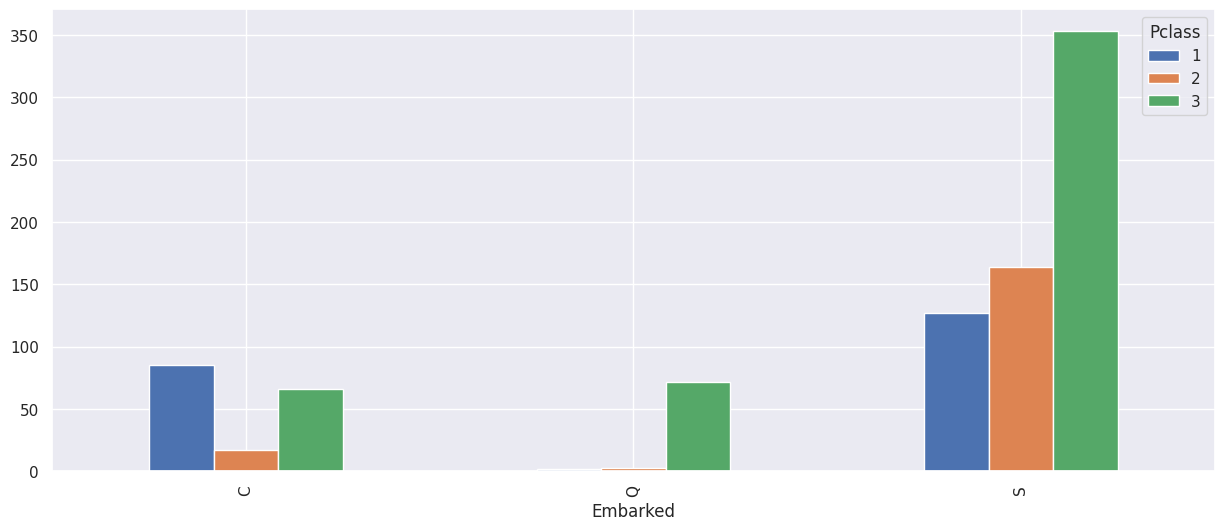

In [ ]:
# Variável Porto de embarque por classe
titanic.groupby('Pclass')['Embarked'].value_counts().unstack(0).plot.bar()

     A variável é categórica e tem campos nulos: uma alternativa preencher com a "moda"

In [ ]:
# Preencher todos os vazios com o porto "S = Southampton" no dataset de treino

titanic['Embarked'] = titanic['Embarked'].fillna('S')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


    Alguns algoritmos têm dificuldade em entender variáveis que possuem mais de uma categoria.
    Acham que é uma variável contínua (0, 1, 2, 3...) que realmente tem significado contínuo.
    A solução é transformar todas as categorias em uma variável diferente de valores 0 e 1,
    chamada de one-hot encoding (n categorias definir n variáveis).

    Exemplo:
    
   ![image-2.png](attachment:image-2.png)

In [ ]:
# Converting categorical variables to a dummy indicators
titanic['male'] = pd.get_dummies(titanic['Sex'],drop_first=True)
titanic.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [ ]:
# Converting categorical variables to a dummy indicators

# dummies variable para Embarked
embarked_dummies = pd.get_dummies(titanic['Embarked'], prefix='Embarked')
titanic = pd.concat([titanic, embarked_dummies], axis=1)

# percebam que aqui estamos excluindo a variável categórica
titanic.drop(['Embarked'], axis=1, inplace=True)
display(titanic.head())


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,1,0,0,1


In [ ]:
# Variável Classe do Bilhete

# Transforma classe em categorica
titanic['Pclass'] = titanic['Pclass'].astype('category')

<Axes: xlabel='Pclass'>

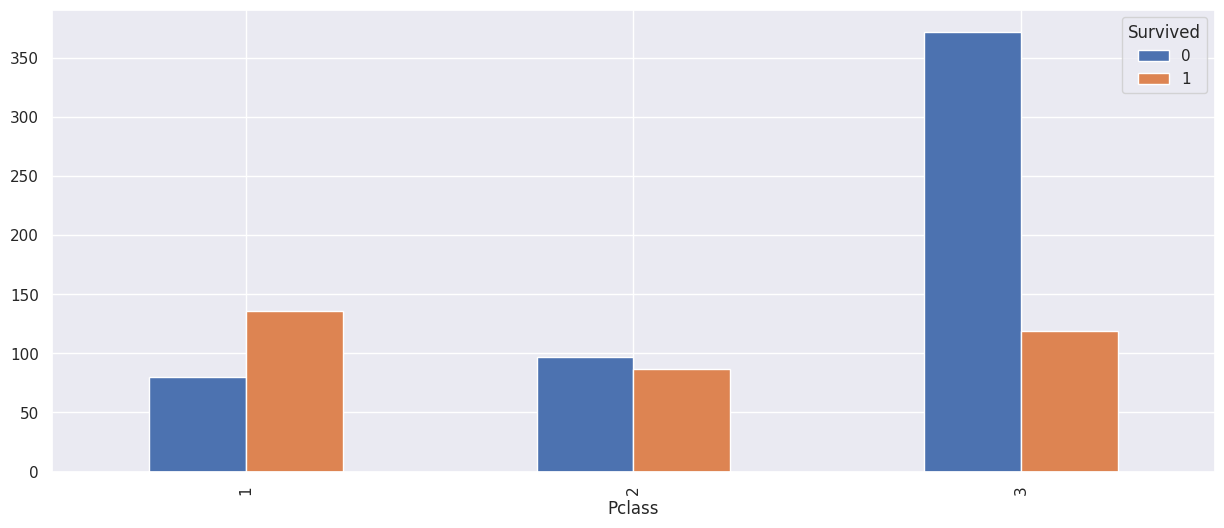

In [ ]:
titanic.groupby('Survived')['Pclass'].value_counts().unstack(0).plot.bar()

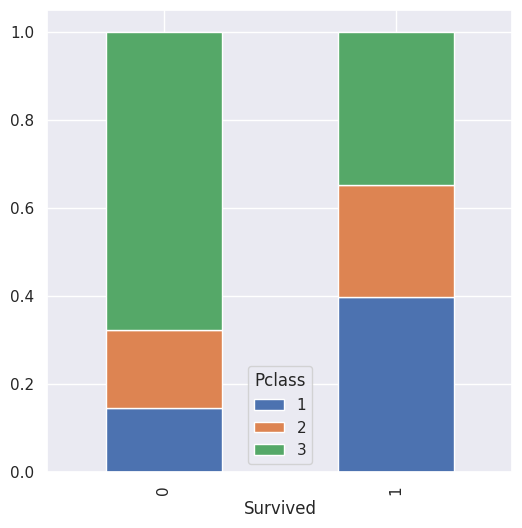

In [ ]:
# comparison between Pclass and target

pclass_tab = pd.crosstab(titanic['Survived'],titanic['Pclass'])
pclass_tab.div(pclass_tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6, 6));

In [ ]:
# dummies variable para pclass

Pclass_dummies = pd.get_dummies(titanic['Pclass'], prefix='Pclass')
titanic = pd.concat([titanic, Pclass_dummies], axis=1)

# titanic.drop(['Pclass'], axis=1, inplace=True)

display(titanic.head())



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,1,0,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,0,1,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0,0,0,1,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,1,0,0,1,0,0,1


    Verificando a situação da base Treino

In [ ]:
pd.DataFrame(zip(titanic.isnull().sum(), titanic.isnull().sum()/len(titanic)), columns=['Count', 'Proportion'], index=titanic.columns)


,Count,Proportion
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  male         891 non-null    uint8   
 12  Embarked_C   891 non-null    uint8   
 13  Embarked_Q   891 non-null    uint8   
 14  Embarked_S   891 non-null    uint8   
 15  Pclass_1     891 non-null    uint8   
 16  Pclass_2     891 non-null    uint8   
 17  Pclass_3     891 non-null    uint8   
dtypes: category(1), float64(2), in

In [ ]:
titanic.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.000000,668.5,891.0
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.000000,1.0,1.0
Age,891.0,29.318643,13.281103,0.42,21.7500,26.507589,36.0,80.0
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.000000,1.0,8.0
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.000000,0.0,6.0
Fare,891.0,31.489295,43.973014,0.00,7.9104,14.454200,31.0,300.0
male,891.0,0.647587,0.477990,0.00,0.0000,1.000000,1.0,1.0
Embarked_C,891.0,0.188552,0.391372,0.00,0.0000,0.000000,0.0,1.0
Embarked_Q,891.0,0.086420,0.281141,0.00,0.0000,0.000000,0.0,1.0
Embarked_S,891.0,0.725028,0.446751,0.00,0.0000,1.000000,1.0,1.0


In [ ]:

# Fazer uma cópia do arquivo titanic e apagar as variáveis não utilizadas no modelo
titanic_copy  = titanic.copy()

titanic_copy= titanic_copy.drop(['PassengerId', 'Name', 'Sex','Ticket', 'Cabin'], axis=1)
titanic_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    891 non-null    int64   
 1   Pclass      891 non-null    category
 2   Age         891 non-null    float64 
 3   SibSp       891 non-null    int64   
 4   Parch       891 non-null    int64   
 5   Fare        891 non-null    float64 
 6   male        891 non-null    uint8   
 7   Embarked_C  891 non-null    uint8   
 8   Embarked_Q  891 non-null    uint8   
 9   Embarked_S  891 non-null    uint8   
 10  Pclass_1    891 non-null    uint8   
 11  Pclass_2    891 non-null    uint8   
 12  Pclass_3    891 non-null    uint8   
dtypes: category(1), float64(2), int64(3), uint8(7)
memory usage: 42.0 KB


In [ ]:
# Pre-processing
# Mudar o formato da variável quantitativa em qualitativa
titanic_copy['Survived']= titanic_copy['Survived'].astype(str)

In [ ]:
titanic_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,891.0,29.318643,13.281103,0.42,21.7500,26.507589,36.0,80.0
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.000000,1.0,8.0
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.000000,0.0,6.0
Fare,891.0,31.489295,43.973014,0.00,7.9104,14.454200,31.0,300.0
male,891.0,0.647587,0.477990,0.00,0.0000,1.000000,1.0,1.0
Embarked_C,891.0,0.188552,0.391372,0.00,0.0000,0.000000,0.0,1.0
Embarked_Q,891.0,0.086420,0.281141,0.00,0.0000,0.000000,0.0,1.0
Embarked_S,891.0,0.725028,0.446751,0.00,0.0000,1.000000,1.0,1.0
Pclass_1,891.0,0.242424,0.428790,0.00,0.0000,0.000000,0.0,1.0
Pclass_2,891.0,0.206510,0.405028,0.00,0.0000,0.000000,0.0,1.0


In [ ]:
# Agora dividir em treino e teste (teste com XX%)


# Dividindo os dados em treino e teste:
#X_train, X_test, y_train, y_test = train_test_split(titanic_copy.drop('Survived',axis=1),titanic_copy['Survived'],test_size=0.01, random_state=17)

X_train, X_test, y_train, y_test = train_test_split(titanic_copy.drop('Survived',axis=1),titanic_copy['Survived'],test_size=0.10, random_state=17)


#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

X_train.shape, X_test.shape

((801, 12), (90, 12))

In [ ]:
y_train

293    0
641    1
207    1
171    0
71     0
      ..
406    0
390    1
143    0
241    1
623    0
Name: Survived, Length: 801, dtype: object

In [ ]:
y_train.value_counts()

0    496
1    305
Name: Survived, dtype: int64

In [ ]:
X_train

,Pclass,Age,SibSp,Parch,Fare,male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
293,3,24.00,0,0,8.8500,0,0,0,1,0,0,1
641,1,24.00,0,0,69.3000,0,1,0,0,1,0,0
207,3,26.00,0,0,18.7875,1,1,0,0,0,0,1
171,3,4.00,4,1,29.1250,1,0,1,0,0,0,1
71,3,16.00,5,2,46.9000,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
406,3,51.00,0,0,7.7500,1,0,0,1,0,0,1
390,1,36.00,1,2,120.0000,1,0,0,1,1,0,0
143,3,19.00,0,0,6.7500,1,0,1,0,0,0,1
241,3,21.75,1,0,15.5000,0,0,1,0,0,0,1


### Primeiro modelo de Classificação Árvore de Decisão



https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

Existem vários algoritmos que podem ser utilizados nessas árvores, dentre eles o ID3, C4.5 e o CART. O foco será esta última abordagem, que é a utilizada pelo scikit-learn. Ela se baseia na separação binária (True | False) de condições utilizando os atributos — features — dos dados.

Esses modelos de aprendizado supervisionado são empregados em tarefas tanto de regressão quanto classificação. O objetivo do método é criar uma árvore que aprende com os dados por meio de regras básicas, chamadas de if-then rules. O modelo identifica qual é o melhor atributo para separar os dados utilizando o critério escolhido, que, neste caso, pode ser entropy ou gini.

As árvores de decisão fazem a separação considerando o atributo,isto é, seleciona o atributo que seja um bom "splitting"

Para isso, ela se baseia nos hiperparâmetros das DecisionTrees: criterion, que é o gini por default, e splitter, que é best por default. Ou seja, ela faz a separação buscando reduzir o coeficiente de gini da melhor (best) forma possível.

Utilizando a entropy , o objetivo vai ser aumentar o ganho de informação reduzindo a entropia da próxima profundidade.

O coeficiente de gini ou entropy mede a heterogeneidade dos dados.
Esta separação busca reduzir esta impureza no próximo ramo (próxima profundidade) como um todo.

![Imagem_DecisionTree.png](attachment:Imagem_DecisionTree.png)

### Hiperparâmetros

    tree = DecisionTreeClassifier(

    criterion='gini', # gini vem por default, mas podemos optar por entropy
    
    splitter='best', # a estratégia utilizada para fazer a separação de cada nó # ela também pode ser feita de forma randômica utilizando 'random'

    max_depth= None, # a máxima profundida que sua árvore de decisão pode ter # se for None ela vai buscar a máxima pureza possível

    min_samples_split = 2, # o mínimo de registros necessários para que uma separação seja feita

    min_samples_leaf = 1, # o mínimo de registros necessários em cada nós-folha (veja a primeira imagem)

    max_features = None, # o número de atributos que será considerado durante o split # None -> seleciona todos os atributos, 'sqrt' -> raiz quadrada do número dos atributos, 'log2' -> log de base 2 do número de atributos

    max_leaf_nodes=None, # a quantidade máxima de nós-folha que a árvore pode ter # se for None ele não limitará o número de nós-folha

    min_impurity_decrease=0.0, # o split irá ocorrer em cada nó se o decréscimo da impureza foi maior ou igual a este valor

    random_state= 17, # permite gerar a mesma amostra (o notebook ser reproduzível)

In [ ]:


Classif_tree = DecisionTreeClassifier(random_state= 17)



In [ ]:
# Treinando com DecisionTree

classif = Classif_tree.fit(X_train, y_train)

# Como treinamos a árvore sem especificar nenhum parâmetro,
# ela cresceu de forma indefinida e ficou grande demais impossibilitando a visualização da mesma.

In [ ]:
# Verificando as features mais importantes para o modelo treinado:
classif.feature_importances_

# O código acima nos retorna um array com o valor de cada variável:

array([0.03681523, 0.23939826, 0.05431881, 0.02432091, 0.21604051,
       0.30922065, 0.0126579 , 0.00406294, 0.01673517, 0.        ,
       0.0078641 , 0.07856553])

In [ ]:
# Mostrando as imporrtâncias das variávei spreditoras com seus respectivos nomes.

for feature,importancia in zip(X_train.columns,classif.feature_importances_):
    print("{}:{}".format(feature, importancia))

Pclass:0.036815226472033266
Age:0.23939826034289616
SibSp:0.05431881228586898
Parch:0.024320905323778372
Fare:0.21604051321543508
male:0.30922064710761654
Embarked_C:0.012657899197749248
Embarked_Q:0.004062938799487555
Embarked_S:0.016735174200915023
Pclass_1:0.0
Pclass_2:0.007864097189803666
Pclass_3:0.07856552586441595


In [ ]:
# Testando o modelo
y_pred_all = classif.predict(X_train)

In [ ]:
y_pred_all

array(['0', '1', '1', '0', '0', '1', '1', '0', '0', '1', '0', '1', '1',
       '1', '0', '1', '0', '1', '0', '1', '0', '0', '0', '1', '0', '1',
       '0', '0', '1', '0', '0', '0', '1', '0', '1', '0', '0', '1', '0',
       '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '1', '0', '0',
       '0', '1', '0', '0', '0', '0', '0', '0', '1', '1', '1', '0', '0',
       '0', '0', '0', '1', '0', '1', '1', '1', '0', '0', '0', '1', '1',
       '0', '0', '1', '0', '1', '0', '1', '0', '1', '1', '1', '0', '0',
       '0', '1', '0', '0', '1', '1', '1', '0', '1', '0', '0', '1', '0',
       '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0',
       '1', '1', '1', '1', '0', '0', '1', '0', '1', '1', '0', '1', '1',
       '0', '0', '1', '1', '0', '0', '1', '1', '0', '1', '1', '1', '1',
       '0', '1', '1', '0', '0', '1', '0', '0', '0', '1', '0', '0', '1',
       '0', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '1', '1',
       '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0

![image.png](attachment:image.png)

In [ ]:
pd.crosstab(y_train, y_pred_all)  # fazendo "na mão"

col_0,0,1
Survived,,
0,494,2
1,11,294


In [ ]:
# from sklearn.metrics import confusion_matrix

# Matriz de Confusão

confusion_matrix = confusion_matrix(y_train, y_pred_all)
confusion_matrix


array([[494,   2],
       [ 11, 294]])

In [ ]:
print(classification_report(y_train, y_pred_all,digits=2))

# Resultado do classification_report:
# Precision score = VP/(VP+FP)
# Recall score = VP/(VP+FN)
# F1 Score = 2* Precision Score * Recall Score/ (Precision Score + Recall Score)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       496
           1       0.99      0.96      0.98       305

    accuracy                           0.98       801
   macro avg       0.99      0.98      0.98       801
weighted avg       0.98      0.98      0.98       801



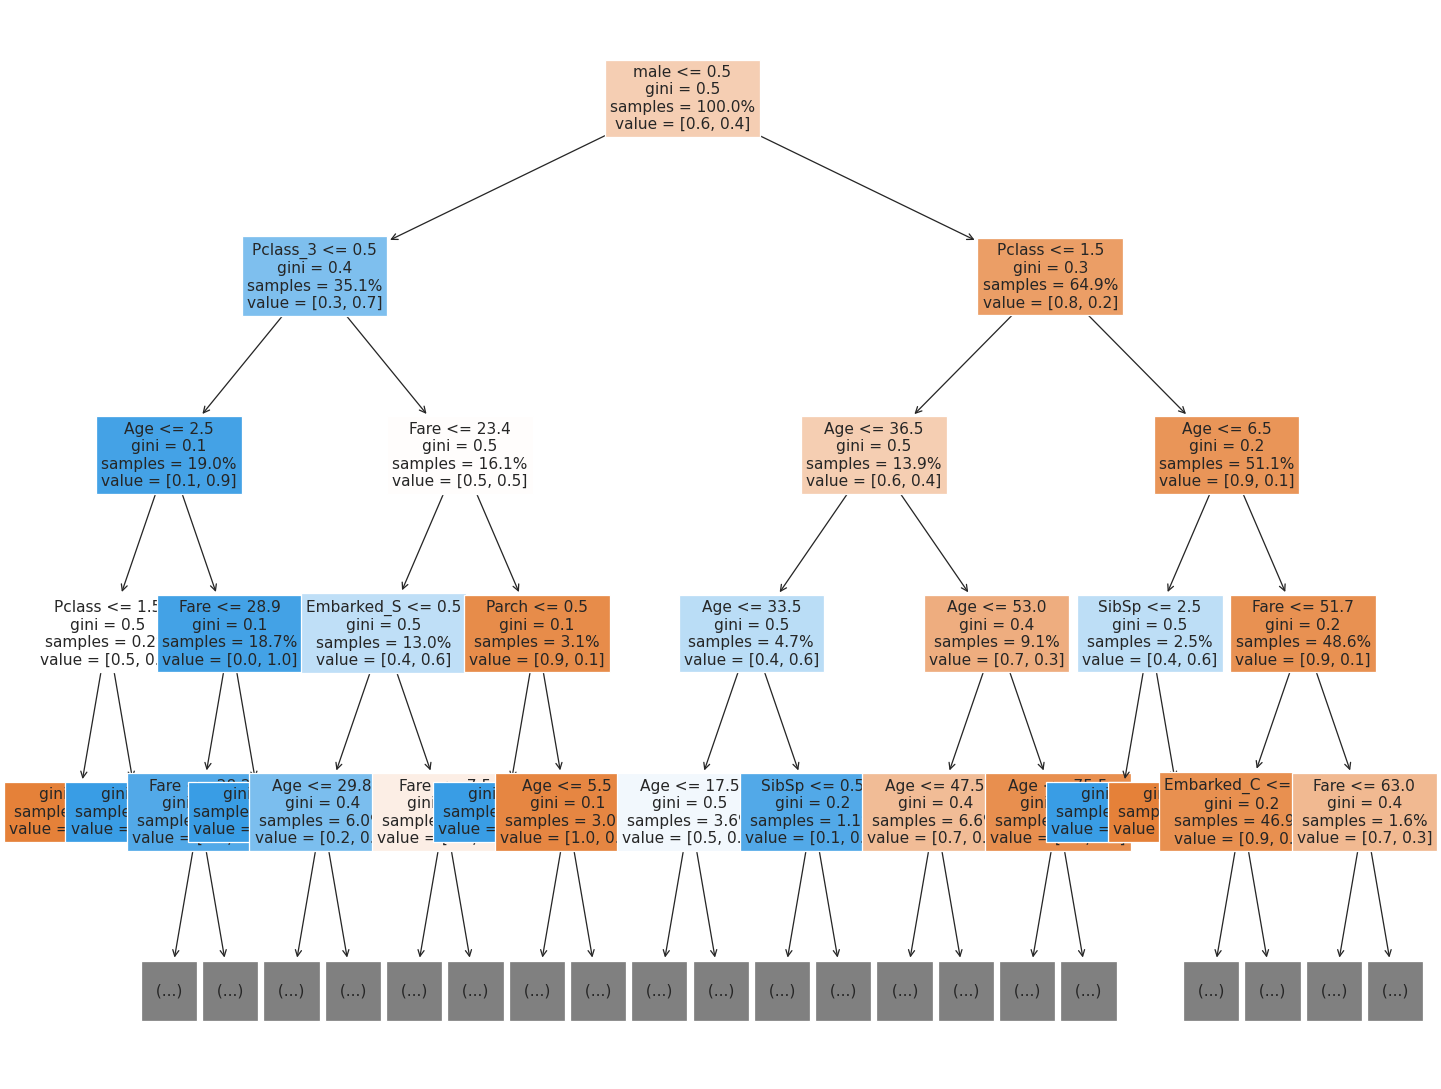

In [ ]:
# criando o fig e o axes  - selecionando alguns niveis
fig, ax = plt.subplots(figsize=(16,12),dpi=92)
#criando o plot
plot_tree(classif, # a decision tree que será plotada
          feature_names =(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Embarked_C','Embarked_Q', 'Embarked_S',
                           'Pclass_1', 'Pclass_2', 'Pclass_3']), # trará o nome das features utilizadas na primeira linha de cada nó
          ax=ax, # plotamos no axes criado do matplotlib
          precision=1, # precisão dos valores numéricos
          filled=True,
          max_depth=4, #  escolhemos a profundidade da árvore
          proportion = True, # retorna a proporção dos valores das amostras
          fontsize = 12 # mudar o tamanho da fonte
        )
#plotando o gráfico
plt.tight_layout();

In [ ]:
##### verificando um acerto médio com cv validadção cruzada

from sklearn.model_selection import cross_val_score


scores_dt = cross_val_score(classif, X_train, y_train, scoring='accuracy', cv=5)
print("DecisionTree score: {}".format(scores_dt.mean()))


DecisionTree score: 0.7852639751552795


In [ ]:
# colocando criterios para árvore
# Critérios'mse'
# max_depth - int - Profundidade Máxima da Árvore
# min_samples_split - int ou float - padrão 2 - Quantidade Mínima de Observações para uma Decisão
# min_samples_leaf - int ou float - Quantidade Mínima de Observações para que um Nó vire Folha (não tenha mais outros nós abaixo)
#random_state - int - seed do gerador de número randômicos (replicabilidade)


clf = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_leaf_nodes=None,
            min_impurity_decrease=0.0,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0,
            random_state=12, splitter='best')

clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=12)

In [ ]:
# Verificando as features mais importantes para o modelo treinado:
clf.feature_importances_

# O código acima nos retorna um array com o valor de cada variável:

array([0.05217052, 0.09636452, 0.04821536, 0.00885622, 0.06371941,
       0.5617347 , 0.        , 0.        , 0.02119356, 0.        ,
       0.00502243, 0.14272327])

In [ ]:
# Mostrando as importâncias das variáveis preditoras com seus respectivos nomes.

for feature,importancia in zip(X_train.columns,clf.feature_importances_):
    print("{}:{}".format(feature, importancia))

Pclass:0.052170517768819646
Age:0.09636451936180905
SibSp:0.04821536012485318
Parch:0.008856224134044207
Fare:0.06371941315012448
male:0.5617346972833427
Embarked_C:0.0
Embarked_Q:0.0
Embarked_S:0.021193564890045338
Pclass_1:0.0
Pclass_2:0.005022433346338874
Pclass_3:0.1427232699406225


In [ ]:
# Testando o modelo - Aplicando na base
y_pred = clf.predict(X_train)

In [ ]:
# Matriz de Confusão
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_train, y_pred)
confusion_matrix

array([[462,  34],
       [ 89, 216]])

In [ ]:
print(classification_report(y_train, y_pred))


              precision    recall  f1-score   support

           0       0.84      0.93      0.88       496
           1       0.86      0.71      0.78       305

    accuracy                           0.85       801
   macro avg       0.85      0.82      0.83       801
weighted avg       0.85      0.85      0.84       801



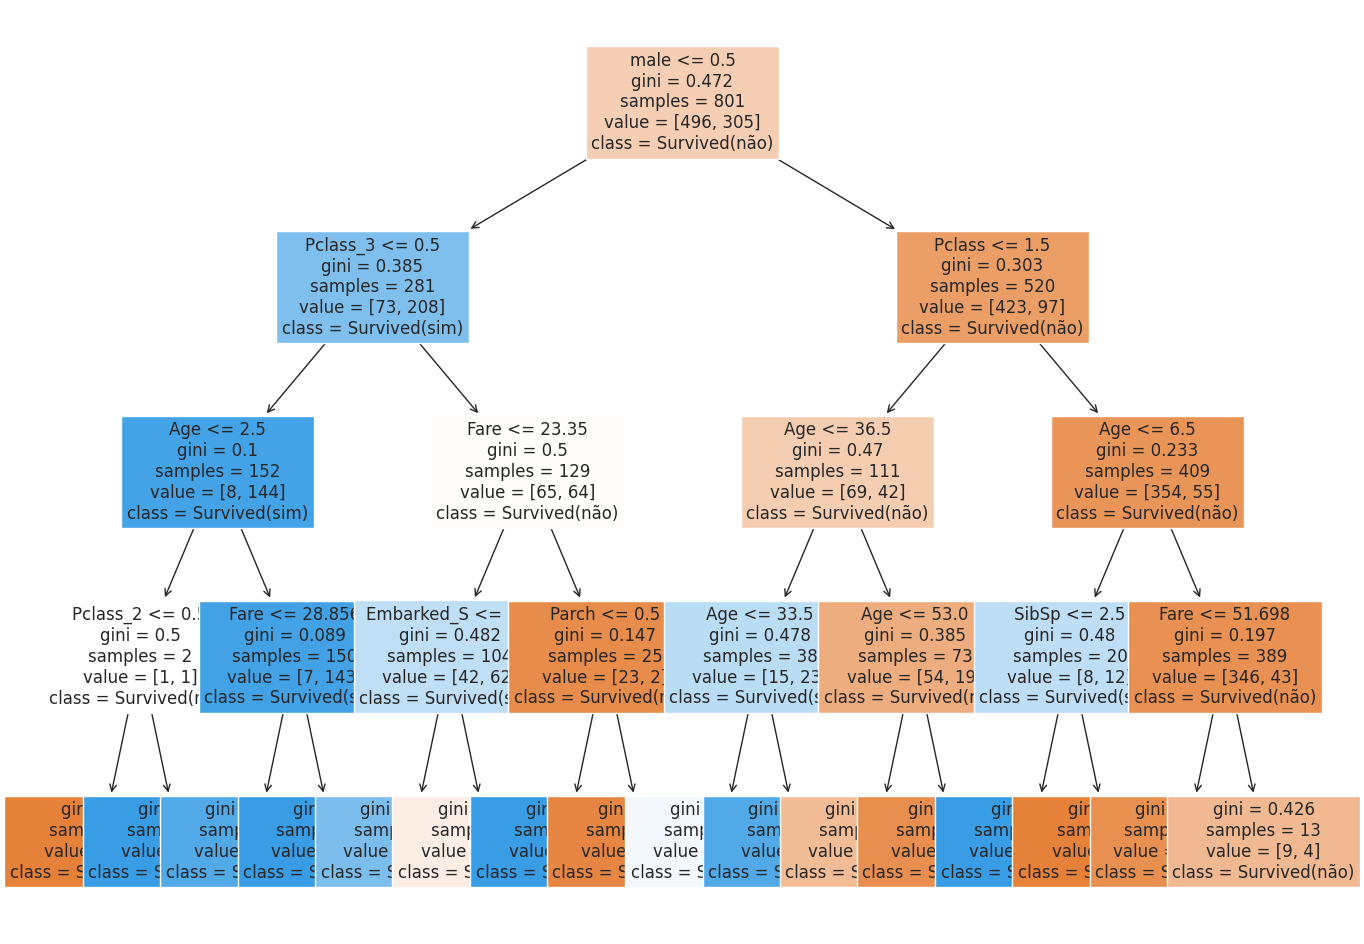

In [ ]:
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(16,12))
a = plot_tree(clf, feature_names =(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Embarked_C','Embarked_Q',
                                    'Embarked_S', 'Pclass_1', 'Pclass_2', 'Pclass_3']), fontsize=12,
filled=True,
class_names=['Survived(não)', 'Survived(sim)'])


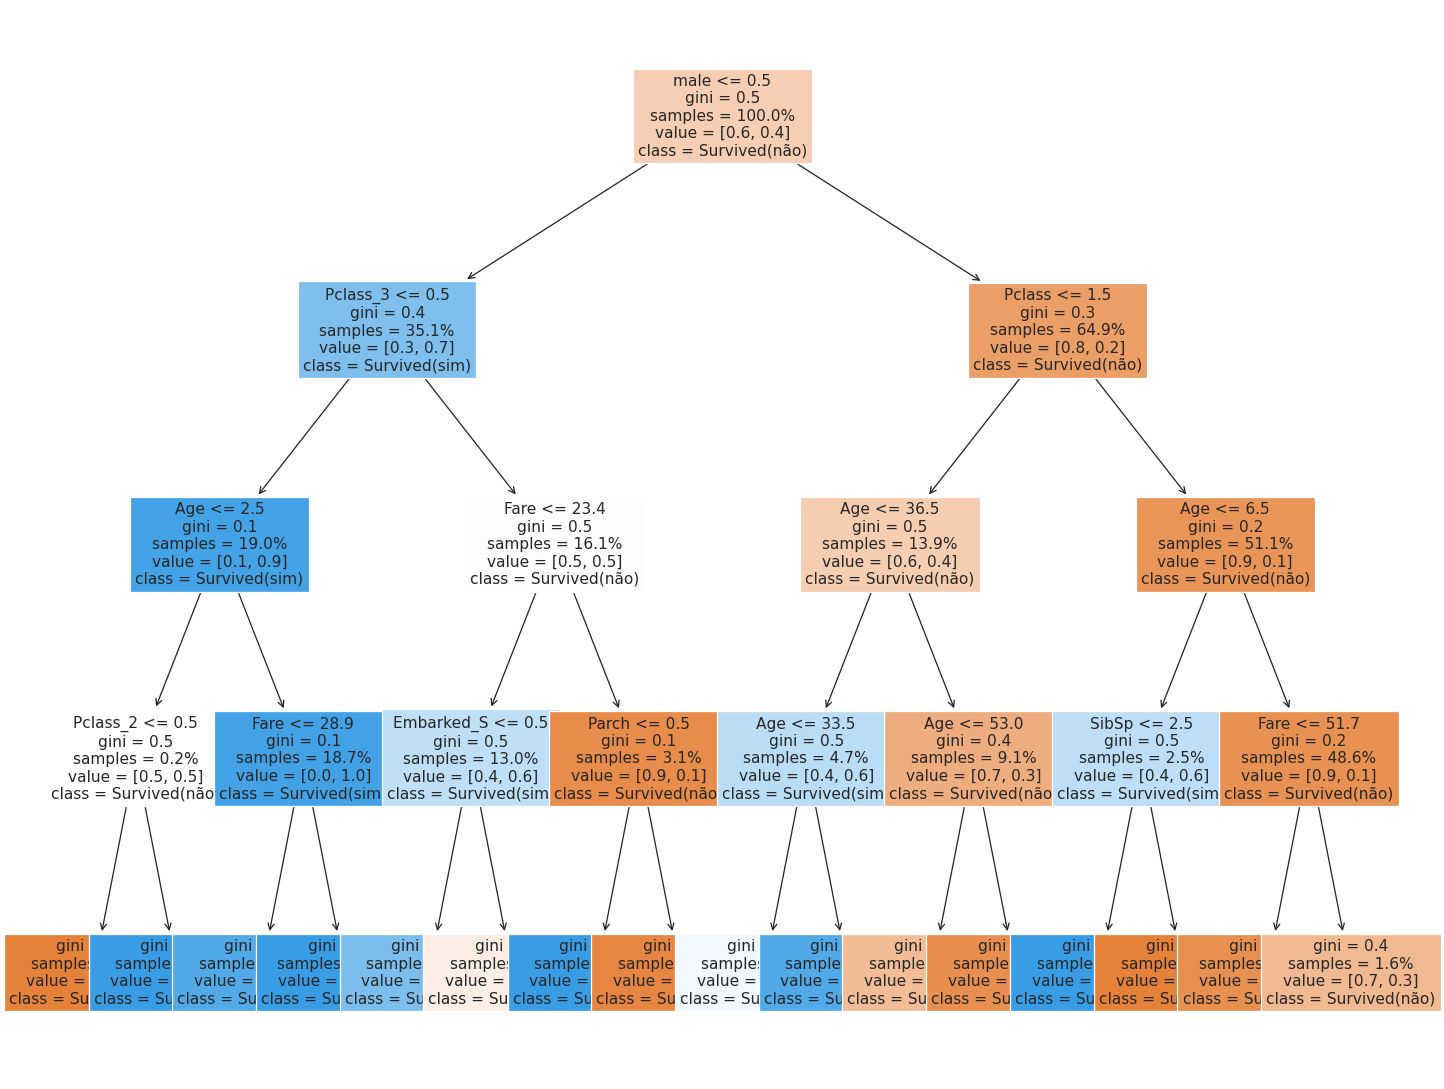

In [ ]:
# criando o fig e o axes  - selecionando alguns niveis
fig, ax = plt.subplots(figsize=(16,12),dpi=92)
#criando o plot
plot_tree(clf, # a decision tree que será plotada
          feature_names =(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Embarked_C','Embarked_Q', 'Embarked_S',
                           'Pclass_1', 'Pclass_2', 'Pclass_3']), # trará o nome das features utilizadas na primeira linha de cada nó
          ax=ax, # plotamos no axes criado do matplotlib
          precision=1, # precisão dos valores numéricos
          filled=True,
          max_depth=4, #  escolhemos a profundidade da árvore
          proportion = True, # retorna a proporção dos valores das amostras
          fontsize = 12, # mudar o tamanho da fonte
          class_names=['Survived(não)', 'Survived(sim)']
         )
#plotando o gráfico
plt.tight_layout();

In [ ]:
# colocando a variável target como numérica novamente

titanic_copy['Survived']= titanic_copy['Survived'].astype(int)

#### Segundo Modelo de Classificação Regressão Logística


    REGRESSÃO LOGÍSTICA
    Encontrar uma função logística, formada por meio de ponderações das variáveis (atributos), cuja resposta permita
    estabelecer a probabilidade de ocorrência de determinado evento e a importância das variáveis (peso)
    para essa ocorrência.


![image.png](attachment:image.png)


#### investigar as chances de sobrevivência das pessoas dados 3 preditores:
        idade da pessoa;
        classe em que a pessoa viajava e
        sexo da pessoa.

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  male         891 non-null    uint8   
 12  Embarked_C   891 non-null    uint8   
 13  Embarked_Q   891 non-null    uint8   
 14  Embarked_S   891 non-null    uint8   
 15  Pclass_1     891 non-null    uint8   
 16  Pclass_2     891 non-null    uint8   
 17  Pclass_3     891 non-null    uint8   
dtypes: category(1), float64(2), in

In [ ]:
# Modelo de Regressão Logística
# Utilizando variáveis numéricas e categóricas

modelo = smf.glm(formula='Survived ~ Age + Pclass + Sex', data=titanic,
               family = sm.families.Binomial()).fit()
print(modelo.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      886
Model Family:                Binomial   Df Model:                            4
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -400.64
Date:                Wed, 18 Oct 2023   Deviance:                       801.29
Time:                        01:47:54   Pearson chi2:                     946.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3511
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       3.7358      0.382      9.780      

Agora, vamos interpretar os resultados do modelo. Os logits estimados só podem ser interpretados em termos de aumento ou diminuição de chances de sobrevivência já que estão em escala logarítmica. Todos os coeficientes estimados foram estatisticamente significativos (p-valor abaixo de 0.05 adotando 95% de confiança).

Pessoas que viajavam na segunda classe possuem menos chances de sobrevivência do que quem viajava na primeira. Quem viajava na terceira classe possui menos chances ainda. Homens possuem menos chances de sobrevivência do que mulheres. Quanto mais velho, menores as chances de sobrevivência. Estas são as intuições gerais do modelo.

Para obtermos coeficientes mais interpretáveis, precisamos fazer uma transformação. Utilizando $e^\beta$ obtemos as chances relativas.

In [ ]:
print(np.exp(modelo.params[1:]))

Pclass[T.2]    0.296007
Pclass[T.3]    0.082023
Sex[T.male]    0.076493
Age            0.963286
dtype: float64


Pessoas que viajavam na segunda classe tinham 0.296 das chances de sobrevivência que as pessoas da primeira classe tinham. Pessoas da terceira classe tinham 0.082 das chances que as pessoas da primeira classe tinham. Homens tinham 0.08 das chances das mulheres.

Para cada ano a mais de sobrevivência o indivíduo fica com 0.96 das chances de outro indivíduo com um ano a menos.

Podemos também gerar os mesmos dados em percentuais relativos de chances para compará-los e obter uma interpretação parecida com a interpretação da regressão linear, mas em termos de chances.

In [ ]:
(np.exp(modelo.params[1:]) - 1) * 100

Pclass[T.2]   -70.399306
Pclass[T.3]   -91.797667
Sex[T.male]   -92.350684
Age            -3.671396
dtype: float64

Agora ficou fácil. Pessoas da segunda classe tem 70% menos chances de sobrevivência do que pessoas da primeira classe. Pessoas da terceira classe tem 92% menos chances de sobrevivência que pessoas da primeira classe. Homens tem 92% menos chances de sobrevivência do que mulheres.

Para cada ano a mais de idade, as chances diminuem 3.68%.

Agora vamos refazer o modelo utilizando somente variáveis numéricas

In [ ]:
# Modelo de Regressão Logística
# Utilizando variáveis numéricas
modelo = smf.glm(formula='Survived ~ Age + Pclass_1 + Pclass_2 + Pclass_3 + male', data=titanic_copy,
             family = sm.families.Binomial()).fit()
print(modelo.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      886
Model Family:                Binomial   Df Model:                            4
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -400.64
Date:                Wed, 18 Oct 2023   Deviance:                       801.29
Time:                        01:47:54   Pearson chi2:                     946.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3511
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8723      0.210      8.917      0.0


Agora vamos refazer o modelo utilizando scikit-learn para maior facilidade de obter as métricas de ajuste.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

    Parametros da Regressão Logística
    
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='none',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
model = LogisticRegression(penalty='none', solver='newton-cg')


In [ ]:
# Agora vamos fazer com sklearn para aproveitar as métricas

baseline_df = titanic[['Survived', 'Pclass', 'Sex', 'Age']].dropna()
baseline_df

,Survived,Pclass,Sex,Age
0,0,3,male,22.00
1,1,1,female,38.00
2,1,3,female,26.00
3,1,1,female,35.00
4,0,3,male,35.00
...,...,...,...,...
886,0,2,male,27.00
887,1,1,female,19.00
888,0,3,female,21.75
889,1,1,male,26.00


In [ ]:
y = baseline_df.Survived
X = pd.get_dummies(baseline_df[['Pclass', 'Sex', 'Age']], drop_first=True)
print(X)

       Age  Pclass_2  Pclass_3  Sex_male
0    22.00         0         1         1
1    38.00         0         0         0
2    26.00         0         1         0
3    35.00         0         0         0
4    35.00         0         1         1
..     ...       ...       ...       ...
886  27.00         1         0         1
887  19.00         0         0         0
888  21.75         0         1         0
889  26.00         0         0         1
890  32.00         0         1         1

[891 rows x 4 columns]


In [ ]:
model.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning:

`penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.



LogisticRegression(penalty='none', solver='newton-cg')

In [ ]:
print(model.coef_) # Temos o mesmo modelo!

[[-0.03740488 -1.21737236 -2.50075157 -2.57055388]]


In [ ]:
# Predizendo as probabilidades
yhat = model.predict_proba(X)

In [ ]:
yhat

array([[0.89644873, 0.10355127],
       [0.08993302, 0.91006698],
       [0.43473448, 0.56526552],
       ...,
       [0.39615049, 0.60384951],
       [0.45195921, 0.54804079],
       [0.92638377, 0.07361623]])

In [ ]:
yhat_1 = yhat[:, 1] # manter somente para a classe positiva

In [ ]:
### Vejamos a matriz de confusão do modelo que estimamos:

from sklearn.metrics import confusion_matrix
confusion_matrix(y, model.predict(X)) # usando a função do sklearn

array([[465,  84],
       [ 99, 243]])

In [ ]:
acuracia = accuracy_score(y, model.predict(X))
print('O modelo obteve %0.4f de acurácia.' % acuracia)

O modelo obteve 0.7946 de acurácia.


A acurácia não é uma medida muito boa para trabalhar com modelos de classificação pois ela pode nos induzir a achar que um modelo que prediz corretamente todos os zeros mas nenhum um é um modelo muito bom. Vejamos outras alternativas de métricas mais interessantes do que a acurácia.

In [ ]:
print(classification_report(y, model.predict(X)))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       549
           1       0.74      0.71      0.73       342

    accuracy                           0.79       891
   macro avg       0.78      0.78      0.78       891
weighted avg       0.79      0.79      0.79       891



O classification report do SciKit-Learn nos provê as três métricas de avaliação apresentadas na figura acima.

Precision é a capacidade do modelo de não prever uma instância negativa como positiva (não cometer erro do tipo 1). Para todas as instância classificadas como positivas, qual é o percentual de acerto.

Recall é a capacidade do modelo de encontrar todas as instâncias positivas. Para todas as instâncias que são de fato positivas, qual é o percentual de acerto.

A métrica F1 conjuga as duas anteriores como uma média harmônica entre ambas. Ela deve sempre ser priorizada para comparar modelos de classificação em relação à acurácia.

Uma excelente alternativa é fazer a curva ROC e calcular o AUC (área debaixo da curva).

A curva ROC (Receiver Operating Characteristic Curve) leva em conta a TPR (True Positive Rate ou Recall ou Sensitity) e a FPR (False Positive Rate ou Specificity).

A curva ROC traça esses dois parâmetros. o AUC (Area Under the Curve) é um valor que sintetiza a informação da curva ROC. Ela varia de 0.5 a 1. Em suma, essa métrica nos diz o quanto o modelo é capaz de distinguir as duas classes. Vejamos o AUC e a curva RUC para o modelo que estimamos.

In [ ]:
print('AUC: %0.2f' % roc_auc_score(y, yhat[:, 1]))

AUC: 0.85


In [ ]:
def plot_roc_curve(y_true, y_score, figsize=(10,6)):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    plt.figure(figsize=figsize)
    auc_value = roc_auc_score(y_true, y_score)
    plt.plot(fpr, tpr, color='orange', label='ROC curve (area = %0.2f)' % auc_value)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()


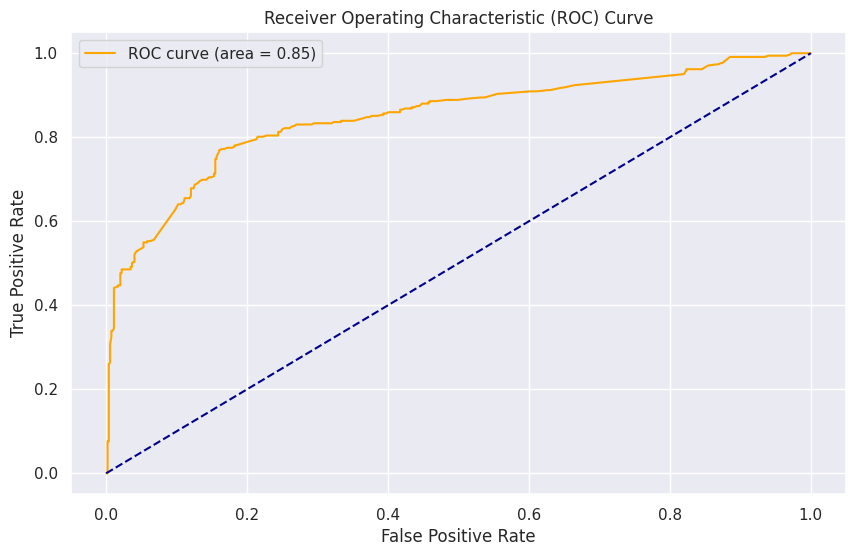

In [ ]:
plot_roc_curve(y, yhat[:, 1])

Podemos considerar uma área debaixo da curva de mais de 0.7 como aceitável. Mais de 0.8 parece bom. Mais de .9 está excelente. Há também outras métricas que podemos explorar.

Agora vamos fazer predições com nosso modelo? Vamos prever/simular a  probabilidade de sobrevivência no Titanic  Para fazer predições, é importante entrar os dados no modelo com o mesmo formato usado para treino.

In [ ]:
eu = pd.DataFrame({'Age':29, 'Pclass_2':0, 'Pclass_3':0, 'Sex_male':0}, index=[0])
minha_prob = model.predict_proba(eu)
print('Eu teria {}% de probabilidade de sobrevivência se estivesse no Titanic'\
      .format(round(minha_prob[:,1][0]*100, 2)))

Eu teria 93.41% de probabilidade de sobrevivência se estivesse no Titanic


In [ ]:
# Usando a base teste
prova = titanic_test
prova.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
# Avaliando a quantidade de NA´s (missing)
pd.DataFrame(zip(prova.isnull().sum(), prova.isnull().sum()/len(prova)), columns=['Count', 'Proportion'], index=prova.columns)


,Count,Proportion
PassengerId,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,86,0.205742
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,1,0.002392
Cabin,327,0.782297


In [ ]:
# aplicando as médias calculadas na base treino
def f(x):
    if not np.isnan(x["Age"]):  # not NaN
        return x["Age"]
    return trainMeans[x["Pclass"], x["Sex"]]

prova['Age'] = prova.apply(f, axis=1)



In [ ]:
# Transforma classe em categorico
prova['Pclass'] = prova['Pclass'].astype('category')

# Converting categorical variables to a dummy indicators

Pclass_dummies = pd.get_dummies(prova['Pclass'], prefix='Pclass')
prova = pd.concat([prova, Pclass_dummies], axis=1)
prova.drop(['Pclass'], axis=1, inplace=True)

Sex_dummies = pd.get_dummies(prova['Sex'], prefix='Sex')
prova = pd.concat([prova,Sex_dummies], axis=1)
prova.drop(['Sex'], axis=1, inplace=True)

display(prova.head())


,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,892,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,Q,0,0,1,0,1
1,893,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,S,0,0,1,1,0
2,894,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,Q,0,1,0,0,1
3,895,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,S,0,0,1,0,1
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,S,0,0,1,1,0


In [ ]:
prova.loc[prova['Fare']>=300, 'Fare'] = 300

In [ ]:
prova.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Name         418 non-null    object 
 2   Age          418 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Ticket       418 non-null    object 
 6   Fare         417 non-null    float64
 7   Cabin        91 non-null     object 
 8   Embarked     418 non-null    object 
 9   Pclass_1     418 non-null    uint8  
 10  Pclass_2     418 non-null    uint8  
 11  Pclass_3     418 non-null    uint8  
 12  Sex_female   418 non-null    uint8  
 13  Sex_male     418 non-null    uint8  
dtypes: float64(2), int64(3), object(4), uint8(5)
memory usage: 31.6+ KB


In [ ]:
prova.describe()

,PassengerId,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
count,418.000000,418.000000,418.000000,418.000000,417.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,29.579566,0.447368,0.392344,35.118006,0.255981,0.222488,0.521531,0.363636,0.636364
std,120.810458,12.915662,0.896760,0.981429,52.413239,0.436934,0.416416,0.500135,0.481622,0.481622
min,892.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,21.750000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1100.500000,26.507589,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000,0.000000,1.000000
75%,1204.750000,36.000000,1.000000,0.000000,31.500000,1.000000,0.000000,1.000000,1.000000,1.000000
max,1309.000000,76.000000,8.000000,9.000000,300.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Selecionar as variáveis

var_prova = prova.iloc[:,[2,10,11,13]].values
var_prova

array([[34.5       ,  0.        ,  1.        ,  1.        ],
       [47.        ,  0.        ,  1.        ,  0.        ],
       [62.        ,  1.        ,  0.        ,  1.        ],
       ...,
       [38.5       ,  0.        ,  1.        ,  1.        ],
       [26.50758893,  0.        ,  1.        ,  1.        ],
       [26.50758893,  0.        ,  1.        ,  1.        ]])

In [ ]:
# Predizendo as probabilidades
yhat_teste = model.predict_proba(var_prova) #prediction
yhat_teste

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



array([[0.93251219, 0.06748781],
       [0.62783555, 0.37216445],
       [0.91460388, 0.08539612],
       [0.91256779, 0.08743221],
       [0.3983896 , 0.6016104 ],
       [0.86519612, 0.13480388],
       [0.47179483, 0.52820517],
       [0.73587049, 0.26412951],
       [0.36313127, 0.63686873],
       [0.89292465, 0.10707535],
       [0.911087  , 0.088913  ],
       [0.63537359, 0.36462641],
       [0.05337673, 0.94662327],
       [0.91748039, 0.08251961],
       [0.12155258, 0.87844742],
       [0.16510159, 0.83489841],
       [0.79596416, 0.20403584],
       [0.89292465, 0.10707535],
       [0.44394779, 0.55605221],
       [0.61019517, 0.38980483],
       [0.70929939, 0.29070061],
       [0.84185704, 0.15814296],
       [0.08008523, 0.91991477],
       [0.40617943, 0.59382057],
       [0.12560345, 0.87439655],
       [0.96104863, 0.03895137],
       [0.05151802, 0.94848198],
       [0.89817202, 0.10182798],
       [0.59105187, 0.40894813],
       [0.911087  , 0.088913  ],
       [0.

In [ ]:
yhat_teste = yhat_teste[:, 1] # manter somente para a classe positiva